In [3]:
import os
import pandas as pd

# Set the working directory
os.chdir("/Users/jade/Desktop/CrystalMarket")

# Load the dataset
df = pd.read_csv("crystal_comments.csv")

# Check dataset structure
print(f"📂 Current Directory: {os.getcwd()}")
print(f"📦 Dataset Loaded! Size: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


📂 Current Directory: /Users/jade/Desktop/CrystalMarket
📦 Dataset Loaded! Size: 4000 rows, 1 columns


,comment
0,I read up on it and the article said only some...
1,"That's so funny, never occurred to me that peo..."
2,“My hemorrhoids sparkled for weeks”
3,"Just the other day, I put a pearl necklace on ..."
4,If it was in front of me right now I definitel...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text (convert to lowercase, remove punctuation)
df["cleaned_text"] = df["comment"].str.lower().str.replace(r"[^\w\s]", "", regex=True)

# Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=30)
tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])

# Get top hot keywords
hot_keywords = vectorizer.get_feature_names_out()
print("🔥 Top Hot Keywords:", hot_keywords)


🔥 Top Hot Keywords: ['20' 'amethyst' 'carry' 'cool' 'crystal' 'crystals' 'dont' 'good' 'grown'
 'im' 'jade' 'just' 'know' 'lab' 'like' 'little' 'looks' 'lost' 'love'
 'make' 'necklace' 'pay' 'people' 'quartz' 'really' 'small' 'stone'
 'thats' 'time' 'worth']


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment for each comment
df["sentiment"] = df["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Check sentiment distribution
print(df["sentiment"].describe())

# Aggregate sentiment for hot keywords
keyword_sentiments = {}
for keyword in hot_keywords:
    keyword_df = df[df["cleaned_text"].str.contains(keyword, na=False)]
    if not keyword_df.empty:
        avg_sentiment = keyword_df["sentiment"].mean()
        keyword_sentiments[keyword] = avg_sentiment

# Convert to DataFrame
sentiment_df = pd.DataFrame(list(keyword_sentiments.items()), columns=["Keyword", "Avg Sentiment"])
sentiment_df.sort_values(by="Avg Sentiment", ascending=False, inplace=True)

# Display sentiment scores
print("\n📊 Sentiment Scores for Top Keywords:")
print(sentiment_df)


count    4000.000000
mean        0.318303
std         0.377525
min        -0.680800
25%         0.000000
50%         0.357700
75%         0.612400
max         0.990800
Name: sentiment, dtype: float64

📊 Sentiment Scores for Top Keywords:
     Keyword  Avg Sentiment
18      love       0.781629
29     worth       0.724975
12      know       0.708033
1   amethyst       0.700220
7       good       0.690460
15    little       0.676783
3       cool       0.596900
28      time       0.596343
11      just       0.594883
21       pay       0.583267
0         20       0.544137
24    really       0.533533
6       dont       0.527200
13       lab       0.514350
14      like       0.486506
17      lost       0.480517
25     small       0.478480
10      jade       0.470925
9         im       0.445944
16     looks       0.414611
5   crystals       0.366643
19      make       0.352986
8      grown       0.339667
4    crystal       0.335200
20  necklace       0.330814
22    people       0.319975
27    

In [7]:
df["sentiment"] = df["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print(df[["cleaned_text", "sentiment"]].head())

                                        cleaned_text  sentiment
0  i read up on it and the article said only some...     0.6124
1  thats so funny never occurred to me that peopl...     0.2006
2                  my hemorrhoids sparkled for weeks     0.0000
3  just the other day i put a pearl necklace on m...     0.3542
4  if it was in front of me right now i definitel...     0.8957


            love  worth  know  amethyst  isPartial
date                                              
2024-02-25   100     59    44         1      False
2024-03-03    94     58    42         1      False
2024-03-10    95     59    44         1      False
2024-03-17    79     57    44         1      False
2024-03-24    73     58    48         1      False
2024-03-31    72     54    43         1      False
2024-04-07    68     55    46         1      False
2024-04-14    72     56    47         1      False
2024-04-21    71     57    44         1      False
2024-04-28    67     54    45         1      False
2024-05-05    68     54    45         1      False
2024-05-12    70     52    44         1      False
2024-05-19    66     53    43         1      False
2024-05-26    68     54    40         1      False
2024-06-02    70     54    43         1      False
2024-06-09    70     54    42         1      False
2024-06-16    77     56    42         1      False
2024-06-23    76     58    41  

<Axes: title={'center': 'Google Trends: Customer Search Trends on Crystals'}, xlabel='date'>

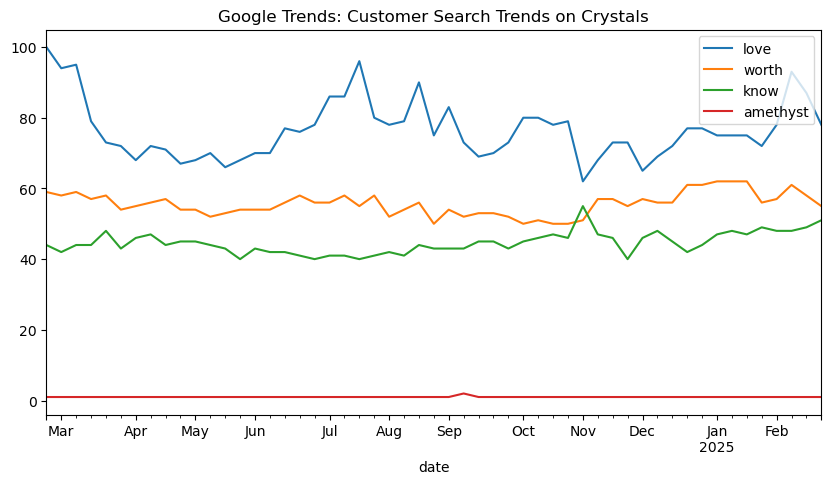

In [10]:
from pytrends.request import TrendReq

# Initialize Google Trends API
pytrends = TrendReq(hl="en-US", tz=360)

# Compare Reddit keywords with Google Trends
keywords = ["love", "worth", "know","amethyst"]
pytrends.build_payload(keywords, timeframe="today 12-m", geo="US")

# Get interest over time
google_trends = pytrends.interest_over_time()

# Display results
print(google_trends)
google_trends.plot(figsize=(10,5), title="Google Trends: Customer Search Trends on Crystals")


🔍 Fetching data for: ['love', 'worth', 'know', 'amethyst', 'good']
🔍 Fetching data for: ['little', 'cool', 'time', 'just', 'pay']
🔍 Fetching data for: ['20', 'really', 'dont', 'lab', 'like']
🔍 Fetching data for: ['lost', 'small', 'jade', 'im', 'looks']
🔍 Fetching data for: ['crystals', 'make', 'grown', 'crystal', 'necklace']
🔍 Fetching data for: ['people', 'thats', 'stone', 'carry', 'quartz']


/Users/jade/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


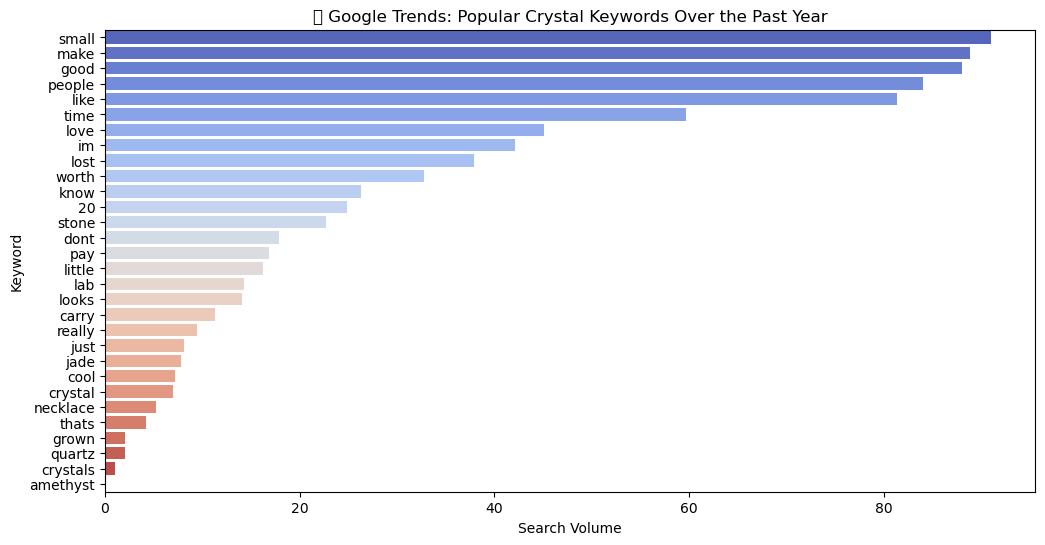

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import time

# Initialize Google Trends API
pytrends = TrendReq(hl="en-US", tz=360)

# Keywords related to crystals (split into batches of 5)
keywords_list = [
    ["love", "worth", "know", "amethyst", "good"],
    ["little", "cool", "time", "just", "pay"],
    ["20", "really", "dont", "lab", "like"],
    ["lost", "small", "jade", "im", "looks"],
    ["crystals", "make", "grown", "crystal", "necklace"],
    ["people", "thats", "stone", "carry", "quartz"]
]

# DataFrame to store trends
df_trends = pd.DataFrame()

# Fetch trends in batches
for keywords in keywords_list:
    print(f"🔍 Fetching data for: {keywords}")
    pytrends.build_payload(keywords, timeframe="today 12-m", geo="US")
    trend_data = pytrends.interest_over_time()

    # Drop 'isPartial' column
    trend_data = trend_data.drop(columns=["isPartial"])

    # Append results
    df_trends = pd.concat([df_trends, trend_data], axis=1)

    # Pause to prevent request limits
    time.sleep(5)

# Compute the average search volume for each keyword
average_trends = df_trends.mean().sort_values(ascending=False)

# Convert to DataFrame
df_results = pd.DataFrame({'Keyword': average_trends.index, 'Search Volume': average_trends.values})

# 🔹 **Bar Plot: Top Crystal Keywords by Search Volume**
plt.figure(figsize=(12, 6))
sns.barplot(y=df_results["Keyword"], x=df_results["Search Volume"], palette="coolwarm")
plt.title("📊 Google Trends: Popular Crystal Keywords Over the Past Year")
plt.xlabel("Search Volume")
plt.ylabel("Keyword")
plt.show()

